Importing the Libraries

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Importing the Data

In [23]:
dataset = pd.read_csv("../heart_disease_prediction/healthcare-dataset-stroke-data.csv")
# print(dataset.to_string())

# just show first 5 rows by using string
print(dataset.head().to_string(index=False))


   id gender  age  hypertension  heart_disease ever_married     work_type Residence_type  avg_glucose_level  bmi  smoking_status  stroke
 9046   Male 67.0             0              1          Yes       Private          Urban             228.69 36.6 formerly smoked       1
51676 Female 61.0             0              0          Yes Self-employed          Rural             202.21  NaN    never smoked       1
31112   Male 80.0             0              1          Yes       Private          Rural             105.92 32.5    never smoked       1
60182 Female 49.0             0              0          Yes       Private          Urban             171.23 34.4          smokes       1
 1665 Female 79.0             1              0          Yes Self-employed          Rural             174.12 24.0    never smoked       1


Identifying the missing values

In [24]:
print(dataset.isnull().sum())



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Replace missing values by using knn method for BMI

In [25]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
dataset['bmi'] = imputer.fit_transform(dataset[['bmi']])

# print(dataset.isnull().sum())
print(dataset.head().to_string(index=False))


   id gender  age  hypertension  heart_disease ever_married     work_type Residence_type  avg_glucose_level       bmi  smoking_status  stroke
 9046   Male 67.0             0              1          Yes       Private          Urban             228.69 36.600000 formerly smoked       1
51676 Female 61.0             0              0          Yes Self-employed          Rural             202.21 28.893237    never smoked       1
31112   Male 80.0             0              1          Yes       Private          Rural             105.92 32.500000    never smoked       1
60182 Female 49.0             0              0          Yes       Private          Urban             171.23 34.400000          smokes       1
 1665 Female 79.0             1              0          Yes Self-employed          Rural             174.12 24.000000    never smoked       1


Checking Name of the all the unique row values for the work type and smoking status

In [26]:
unique_work_types = dataset['work_type'].unique()
unique_smoking_status = dataset['smoking_status'].unique()
print(unique_work_types)
print(unique_smoking_status)



['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Combine 'children' and 'Never_worked' into a single category


In [27]:
dataset['work_type'] = dataset['work_type'].replace({'children': 'Combined', 'Never_worked': 'Combined'})

converting work_type and smoking status into the category

In [28]:
dataset['work_type'] = dataset['work_type'].map({'Private': 1, 'Self-employed': 2, 'Govt_job': 3, 'Combined': 4})
dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked': 1, 'never smoked': 2,'smokes': 3, 'Unknown': 4})

# print(dataset.isnull().sum())
# print(dataset.to_string(index=False))
print(dataset.head().to_string(index=False))





   id gender  age  hypertension  heart_disease ever_married  work_type Residence_type  avg_glucose_level       bmi  smoking_status  stroke
 9046   Male 67.0             0              1          Yes          1          Urban             228.69 36.600000               1       1
51676 Female 61.0             0              0          Yes          2          Rural             202.21 28.893237               2       1
31112   Male 80.0             0              1          Yes          1          Rural             105.92 32.500000               2       1
60182 Female 49.0             0              0          Yes          1          Urban             171.23 34.400000               3       1
 1665 Female 79.0             1              0          Yes          2          Rural             174.12 24.000000               2       1


converting gender, ever_married, residance_type column into the 1 and 0 

In [29]:
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0, 'Other': 0})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['Residence_type'] = dataset['Residence_type'].map({'Urban': 1, 'Rural': 0})

# print(dataset.isnull().sum())
# print(dataset.to_string(index=False))
print(dataset.head().to_string(index=False))

   id  gender  age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level       bmi  smoking_status  stroke
 9046       1 67.0             0              1             1          1               1             228.69 36.600000               1       1
51676       0 61.0             0              0             1          2               0             202.21 28.893237               2       1
31112       1 80.0             0              1             1          1               0             105.92 32.500000               2       1
60182       0 49.0             0              0             1          1               1             171.23 34.400000               3       1
 1665       0 79.0             1              0             1          2               0             174.12 24.000000               2       1


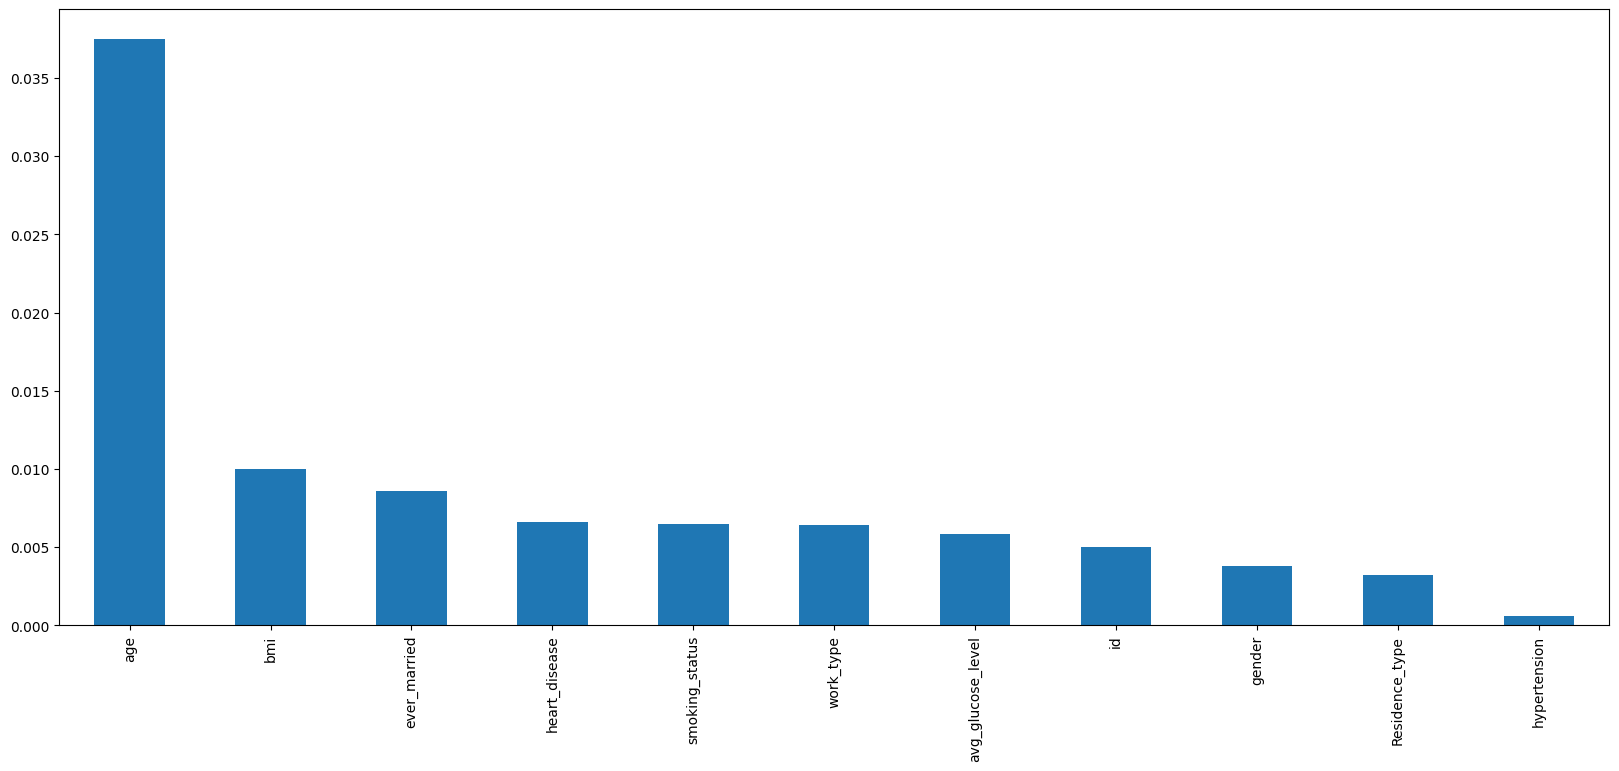

id : -0.01990713341679493


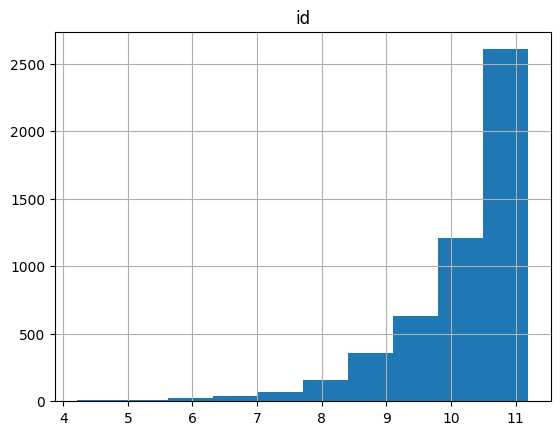

gender : 0.34964640956382553


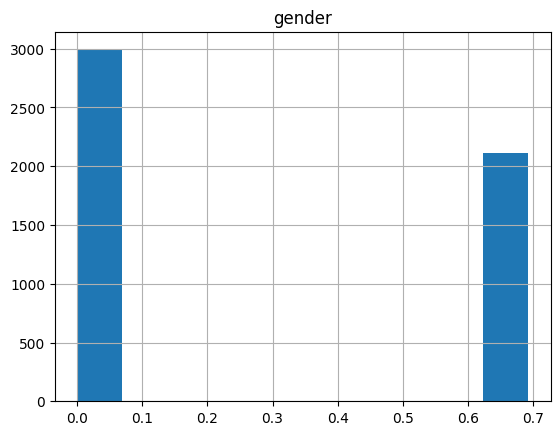

age : -0.1370190866396024


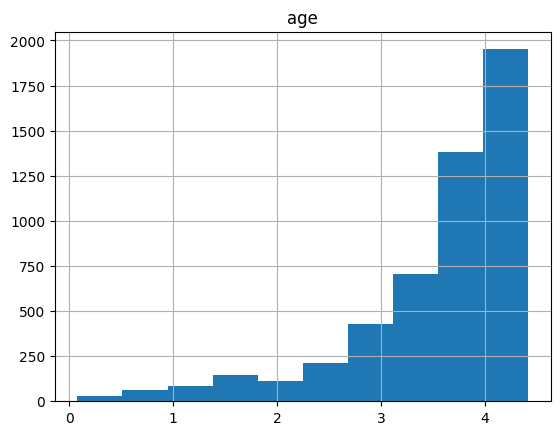

hypertension : 2.714594511421973


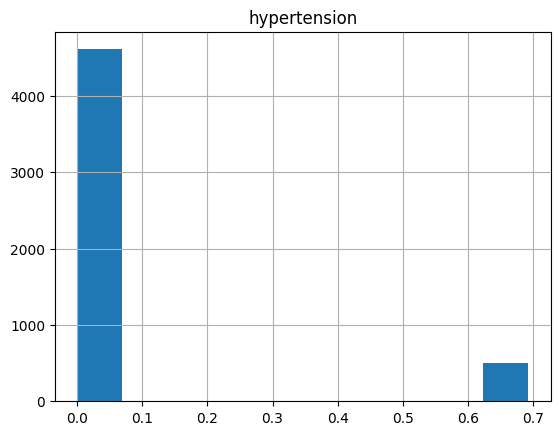

heart_disease : 3.9460851899886302


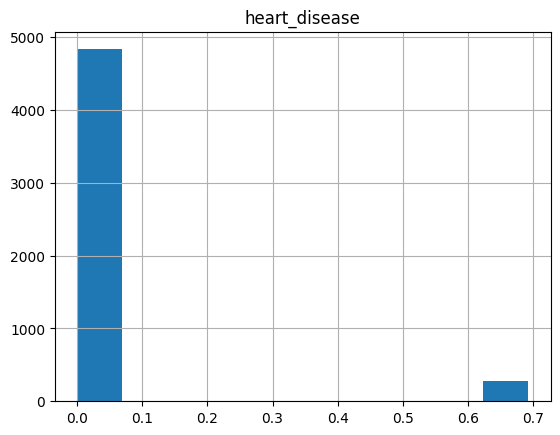

ever_married : -0.6575521915370907


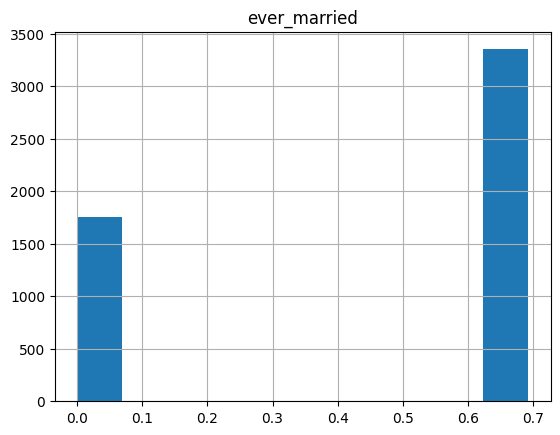

work_type : 0.942986551154927


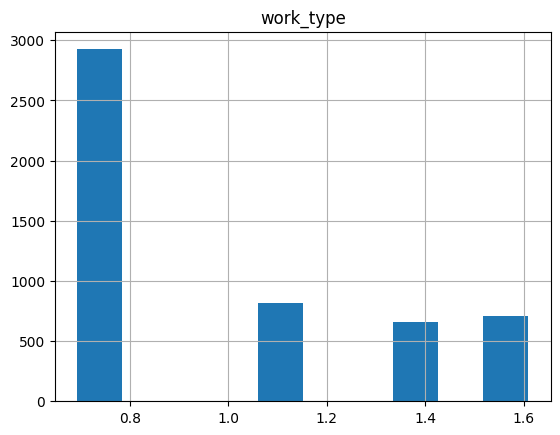

Residence_type : -0.03209806643844619


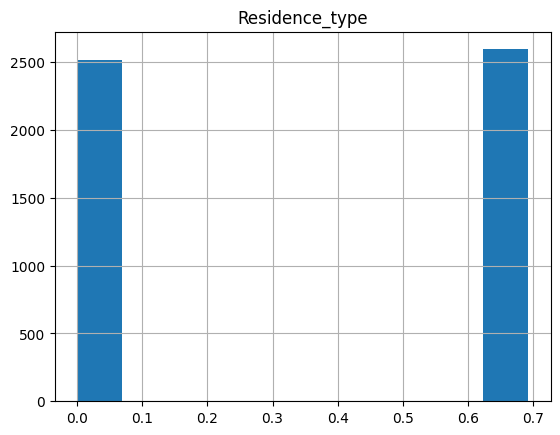

avg_glucose_level : 1.571822297397199


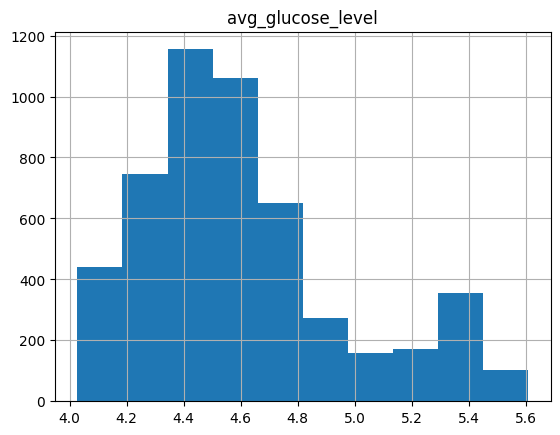

bmi : 1.0763999841401004


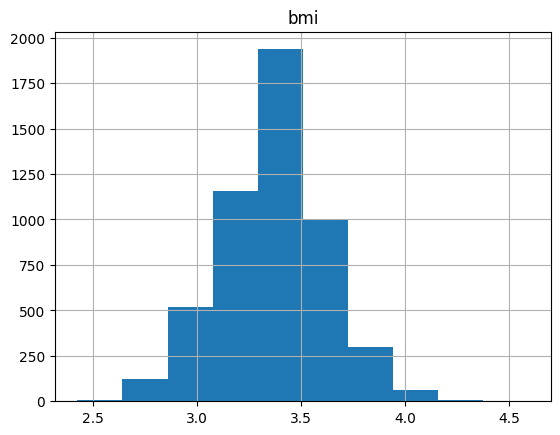

smoking_status : 0.07783971063467955


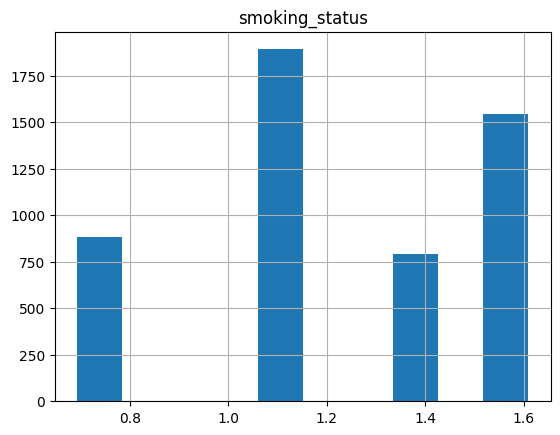

In [30]:
# MI Chart Plot

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(dataset.drop('stroke', axis=1), dataset['stroke'])

mi_scores = pd.Series(mi_scores, name="MI Scores", index=dataset.drop('stroke', axis=1).columns)

mi_scores = mi_scores.sort_values(ascending=False)

mi_scores.plot.bar(figsize=(20, 8))

plt.show()

# draw Skewness histogram

from scipy.stats import skew

for i in dataset.columns:
    if i!= 'stroke':
        skewness = skew(dataset[i].dropna())
        print(f"{i} : {skewness}")
        dataset[i] = np.log1p(dataset[i])
        dataset.hist(column=i)
        plt.show()


remove skewness

In [31]:
from scipy.stats import skew

def remove_skewness(df):
    skewness_features = df.apply(lambda x: skew(x.dropna()))
    skewness_features = skewness_features[skewness_features > 0.75]
    df[skewness_features.index] = np.log1p(df[skewness_features.index])
    return df

dataset = remove_skewness(dataset)
# print(dataset.isnull().sum())
# print(dataset.to_string(index=False))
print(dataset.head().to_string(index=False))


       id   gender      age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level      bmi  smoking_status   stroke
 9.110188 0.693147 4.219508      0.000000       0.526589      0.693147   0.693147        0.693147           1.862021 3.627004        0.693147 0.693147
10.852768 0.000000 4.127134      0.000000       0.000000      0.693147   1.098612        0.000000           1.842807 3.397632        1.098612 0.693147
10.345381 0.693147 4.394449      0.000000       0.526589      0.693147   0.693147        0.000000           1.735556 3.511545        1.098612 0.693147
11.005145 0.000000 3.912023      0.000000       0.000000      0.693147   0.693147        0.693147           1.816262 3.566712        1.386294 0.693147
 7.418181 0.000000 4.382027      0.526589       0.000000      0.693147   1.098612        0.000000           1.818965 3.218876        1.098612 0.693147


Checking after the skewness

id : -1.8459296868686326


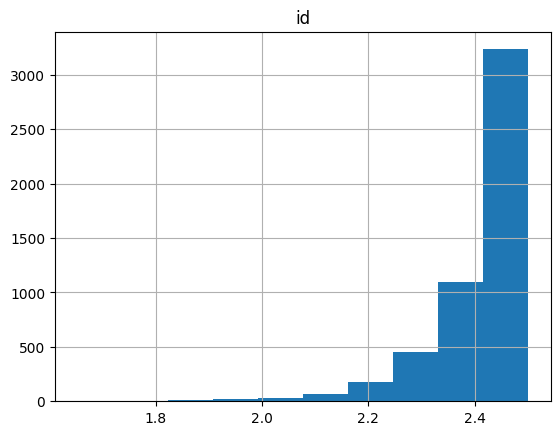

gender : 0.34964640956382553


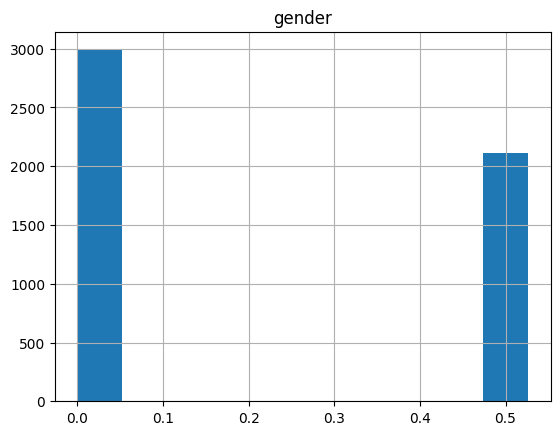

age : -1.6768591698507733


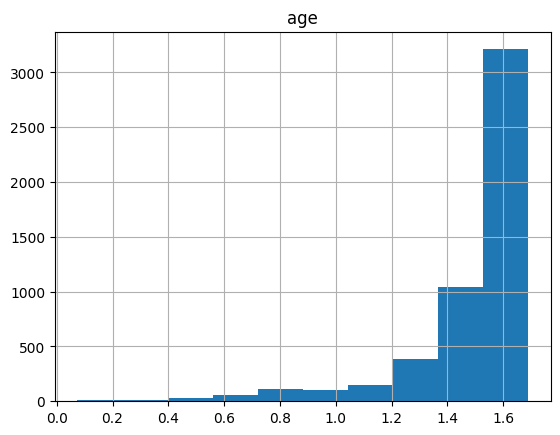

hypertension : 2.714594511421973


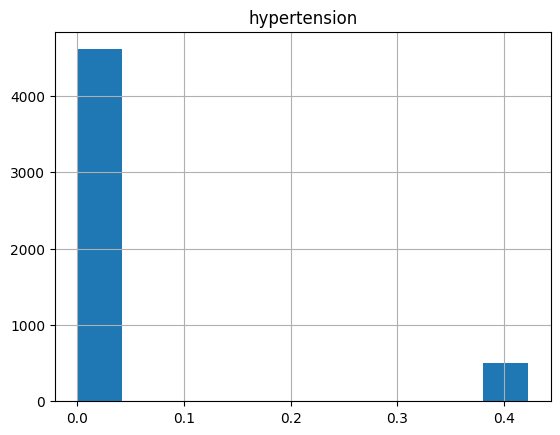

heart_disease : 3.9460851899886307


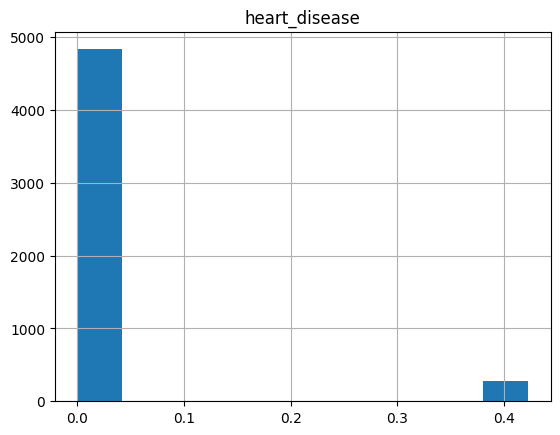

ever_married : -0.65755219153709


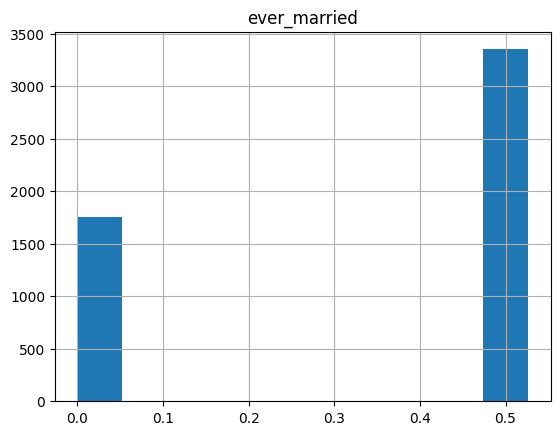

work_type : 0.7217354267305407


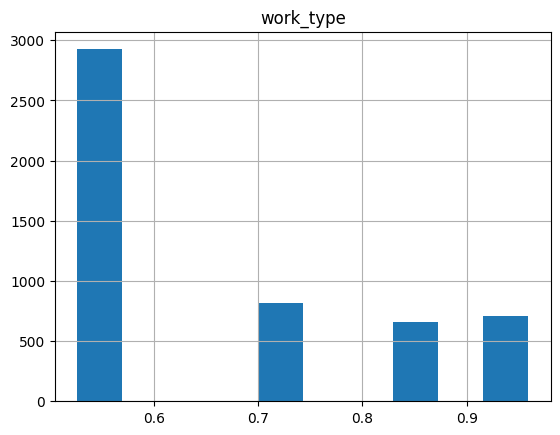

Residence_type : -0.03209806643844569


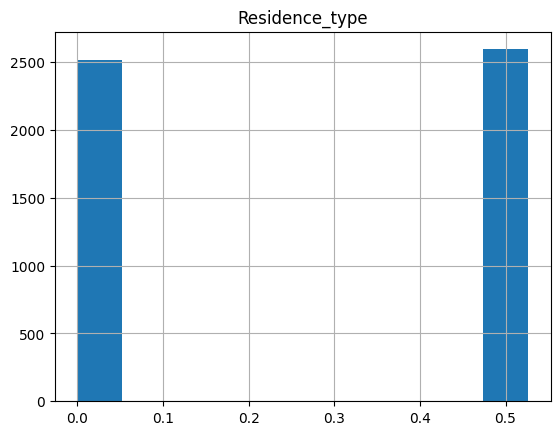

avg_glucose_level : 0.7596225253125704


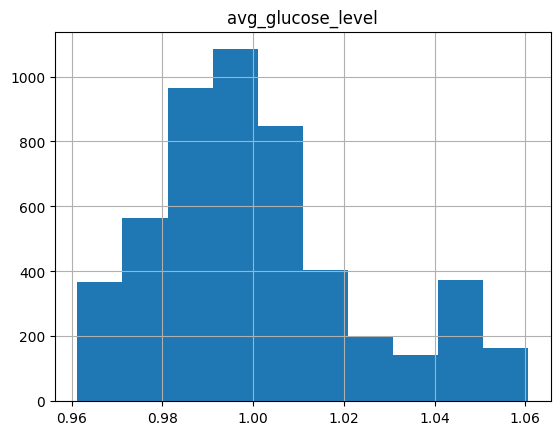

bmi : 0.017160300291044234


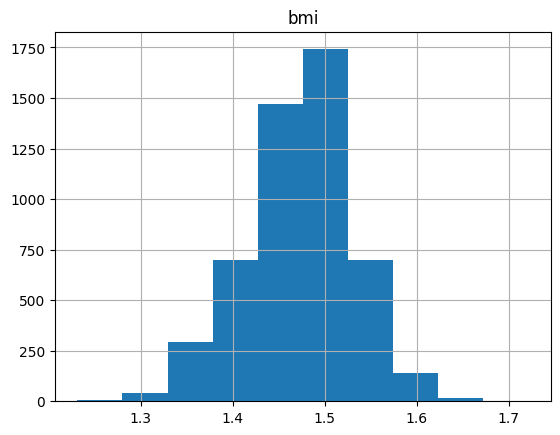

smoking_status : -0.2897335201576146


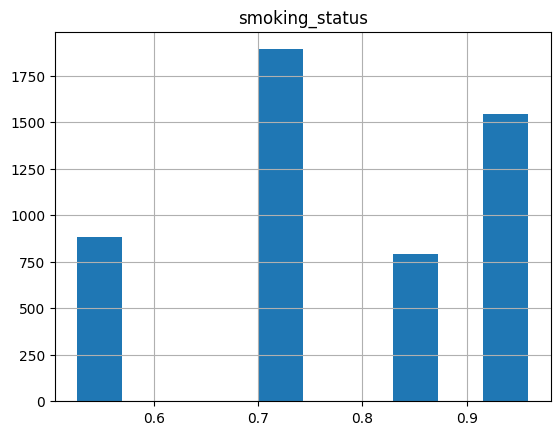

In [32]:
for i in dataset.columns:
    if i!= 'stroke':
        skewness = skew(dataset[i].dropna())
        print(f"{i} : {skewness}")
        dataset[i] = np.log1p(dataset[i])
        dataset.hist(column=i)
        plt.show()

Correlation Matrix

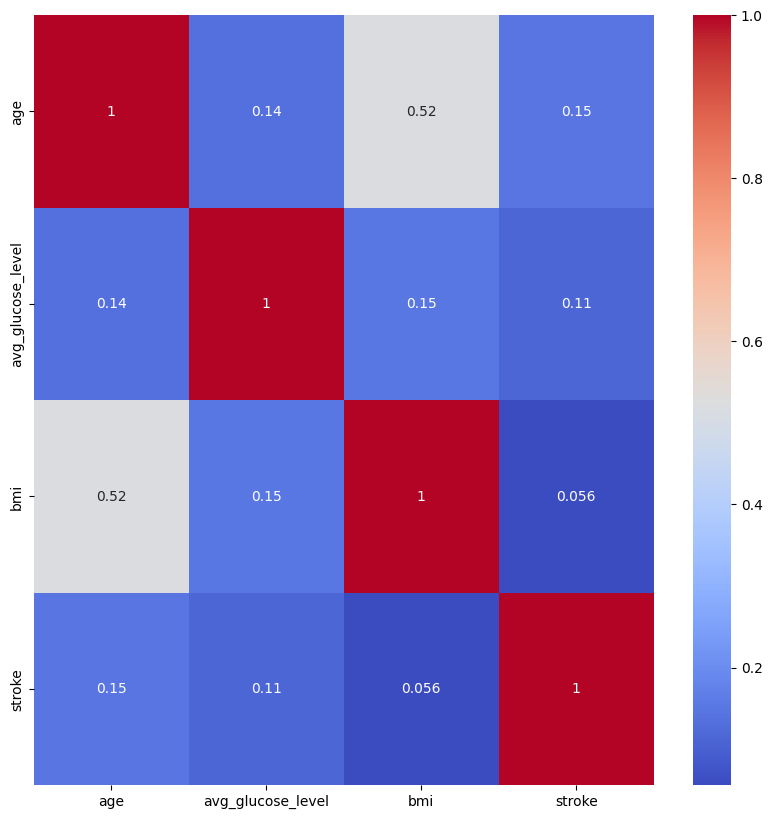

In [33]:
import seaborn as sns

corr_matrix = dataset[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.coolwarm)
plt.show()

for all

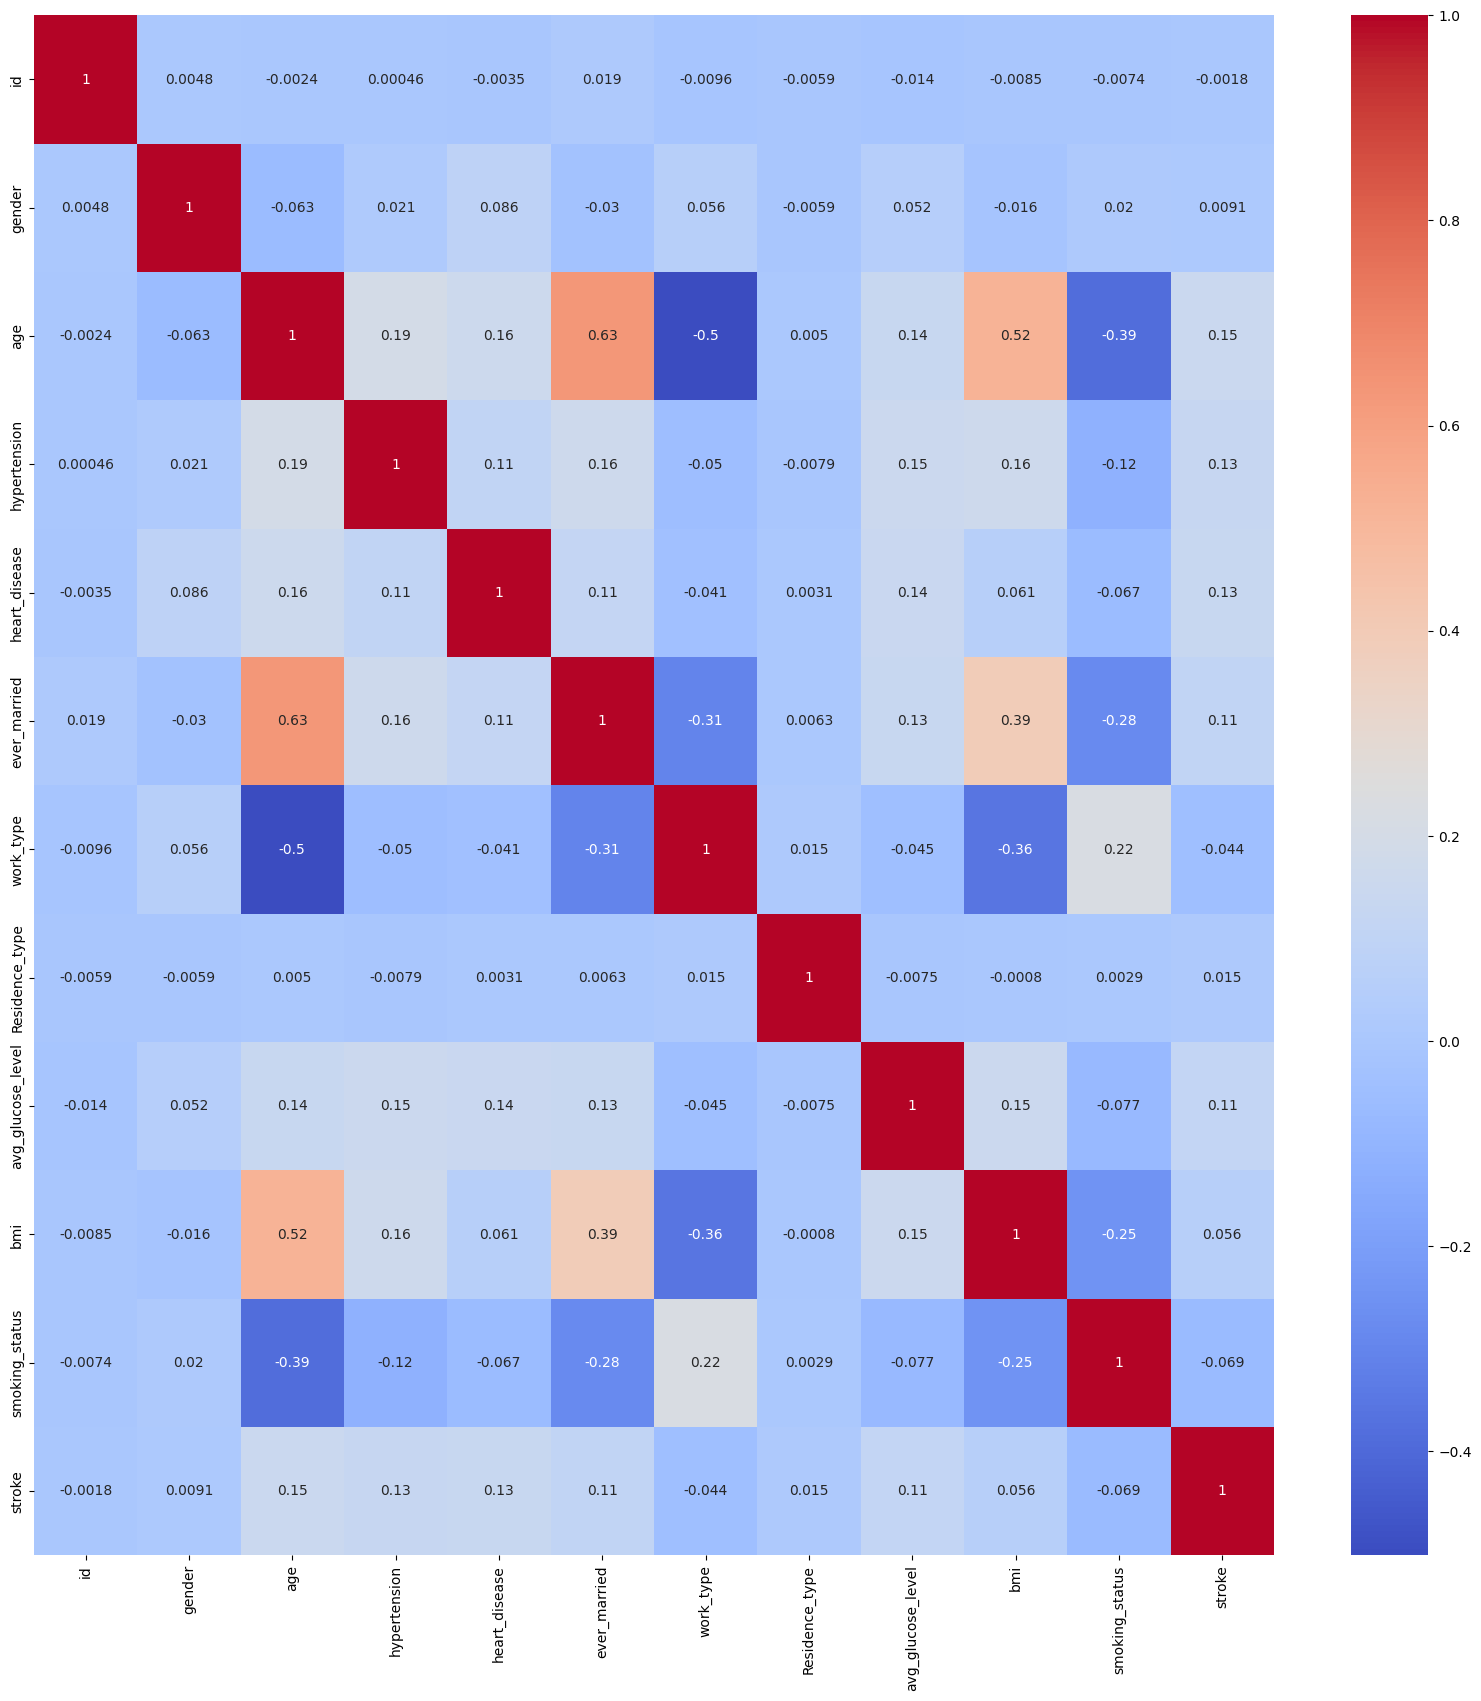

In [34]:
corr_matrix = dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.coolwarm)
plt.show()

Training 

In [35]:
from sklearn.model_selection import train_test_split

x = dataset.drop('stroke', axis=1)
y = dataset['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train Data shape on x-axis : \n",x_train.shape,"\nTrain Data shape on y-axis : \n", y_train.shape)
print("Test Data shape on x-axis : \n",x_test.shape,"\nTest Data shape on y-axis : \n", y_test.shape)

Train Data shape on x-axis : 
 (4088, 11) 
Train Data shape on y-axis : 
 (4088,)
Test Data shape on x-axis : 
 (1022, 11) 
Test Data shape on y-axis : 
 (1022,)


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Check class distribution
print("Class distribution in y_train:", np.bincount(y_train))
print("Class distribution in y_test:", np.bincount(y_test))

# Check unique values in target variable
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

# Ensure target variable is categorical
if y_train.dtype != 'int' and y_train.dtype != 'bool':
    y_train = np.round(y_train).astype(int)
if y_test.dtype != 'int' and y_test.dtype != 'bool':
    y_test = np.round(y_test).astype(int)

# Handle missing values in features
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

Class distribution in y_train: [4088]
Class distribution in y_test: [1022]
Unique values in y_train: [0.         0.69314718]
Unique values in y_test: [0.         0.69314718]


LogisticRegression

In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
predictions = rf_model.predict(x_test)

# Print evaluation metrics
print("Accuracy Score: ", accuracy_score(y_test, predictions))
print("Precision Score: ", precision_score(y_test, predictions, zero_division=1))
print("Recall Score: ", recall_score(y_test, predictions, zero_division=1))
print("F1 Score: ", f1_score(y_test, predictions, zero_division=1))
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy Score:  0.9393346379647749
Precision Score:  1.0
Recall Score:  0.0
F1 Score:  0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022

Confusion Matrix:
 [[960   0]
 [ 62   0]]


Random Forest

In [38]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
predictions = log_model.predict(x_test)

# Print evaluation metrics

print("Accuracy Score: ", accuracy_score(y_test, predictions))
print("Precision Score: ", precision_score(y_test, predictions, zero_division=1))
print("Recall Score: ", recall_score(y_test, predictions, zero_division=1))
print("F1 Score: ", f1_score(y_test, predictions, zero_division=1))
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))

Accuracy Score:  0.9393346379647749
Precision Score:  1.0
Recall Score:  0.0
F1 Score:  0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022



KNeighbors Classifier

In [39]:
# KNeighbors Classifier 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(x_train, y_train)
knn_grid.best_params_
knn_predictions = knn_grid.predict(x_test)

# Print evaluation metrics

print("Accuracy Score: ", accuracy_score(y_test, knn_predictions))
print("Precision Score: ", precision_score(y_test, knn_predictions, zero_division=1))
print("Recall Score: ", recall_score(y_test, knn_predictions, zero_division=1))
print("F1 Score: ", f1_score(y_test, knn_predictions, zero_division=1))
print("Classification Report:\n", classification_report(y_test, knn_predictions, zero_division=1))

Accuracy Score:  0.9393346379647749
Precision Score:  0.5
Recall Score:  0.016129032258064516
F1 Score:  0.03125
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022



Support Vector Machine (SVM)

In [40]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train, y_train)
predictions = svm_model.predict(x_test)

# Print evaluation metrics

print("Accuracy Score: ", accuracy_score(y_test, predictions))
print("Precision Score: ", precision_score(y_test, predictions, zero_division=1))
print("Recall Score: ", recall_score(y_test, predictions, zero_division=1))
print("F1 Score: ", f1_score(y_test, predictions, zero_division=1))
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))

Accuracy Score:  0.9393346379647749
Precision Score:  1.0
Recall Score:  0.0
F1 Score:  0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022



DecisionTreeClassifier

In [41]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
predictions = dt_model.predict(x_test)

# Print evaluation metrics

print("Accuracy Score: ", accuracy_score(y_test, predictions))
print("Precision Score: ", precision_score(y_test, predictions, zero_division=1))
print("Recall Score: ", recall_score(y_test, predictions, zero_division=1))
print("F1 Score: ", f1_score(y_test, predictions, zero_division=1))
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))

Accuracy Score:  0.910958904109589
Precision Score:  0.16279069767441862
Recall Score:  0.11290322580645161
F1 Score:  0.13333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.16      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022



XGB Classifier

In [42]:
from xgboost import XGBClassifier


xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

grid_search = GridSearchCV(XGBClassifier(), xgboost_params, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
xgb_model = XGBClassifier(max_depth=grid_search.best_params_['max_depth'], min_child_weight=grid_search.best_params_['min_child_weight'])
xgb_model.fit(x_train, y_train)
predictions = xgb_model.predict(x_test)

# Print evaluation metrics

print("Accuracy Score: ", accuracy_score(y_test, predictions))
print("Precision Score: ", precision_score(y_test, predictions, zero_division=1))
print("Recall Score: ", recall_score(y_test, predictions, zero_division=1))
print("F1 Score: ", f1_score(y_test, predictions, zero_division=1))
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))

Best Parameters:  {'max_depth': 5, 'min_child_weight': 1}
Accuracy Score:  0.9363992172211351
Precision Score:  0.4
Recall Score:  0.0967741935483871
F1 Score:  0.15584415584415584
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.40      0.10      0.16        62

    accuracy                           0.94      1022
   macro avg       0.67      0.54      0.56      1022
weighted avg       0.91      0.94      0.92      1022

